In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


from statsmodels.api import qqplot,add_constant

from sklearn.metrics import f1_score,roc_curve,auc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [8]:
from matplotlib import font_manager,rc
font_path = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
member=pd.read_csv("./df_order_product_preprocessed.csv",engine="python",encoding='utf-8-sig')
df_order.head()

,Unnamed: 0,Unnamed: 0.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,사은품
0,0,0,무통장입금,44550.0,교환안함,0.0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,...,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450.0,42602,0
1,1,1,무통장입금,44000.0,교환안함,0.0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,...,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620.0,42930,0
2,2,2,무통장입금,6820.0,교환안함,0.0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,...,비회원,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910.0,42998,0
3,3,3,무통장입금,49500.0,교환안함,0.0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,...,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600.0,43063,0
4,4,4,무통장입금,61600.0,교환안함,0.0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,...,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710.0,43066,0


In [9]:
df_order_raw=pd.read_csv("./log_order_sheet.csv",engine="python",encoding='utf-8-sig')
df_member_raw=pd.read_csv("./master_member_sheet.csv",engine="python",encoding='utf-8-sig')
df_product_raw=pd.read_csv("./master_product_sheet.csv",engine="python",encoding='utf-8-sig')
df_order_pre1=pd.read_csv("./df_order_final_zerodragon.csv",engine="python",encoding='utf-8-sig') #결측치 처리
df_order_pre2=pd.DataFrame()
df_order_pre2=df_order_pre1.copy()
# df.o(columns = {'old_nm' : 'new_nm'), inplace = True)




In [11]:
df_merge=pd.DataFrame()
df_merge=df_product_raw.copy()

In [ ]:
df_merge=pd.merge(df_product_raw,df_order_raw,on)

In [10]:
dic={}
match=[]
unmatch=[]
code_of_unmatched=set()

for i in range(df_product_raw.shape[0]):
    dic[df_product_raw.loc[i,"상품명(기본)"]]=df_product_raw.loc[i,"상품코드"]
print(len(dic))


for i in range(df_order_raw.shape[0]):
    if df_order_raw.loc[int(i),"상품명"] in dic:
        x=1
            
    else: 
#         print("==========",df_order_raw.loc[int(i),["상품번호","상품명"]],"===========")
        unmatch.append(df_order_raw.loc[i,["상품번호","상품명"]])
        code_of_unmatched.add(df_order_raw.loc[int(i),"상품번호"])
# print(f"===================== num of match {len(match)}======================")
# for st in match:
#     print(st)
print(f"===================== num of unmatch {len(unmatch)}======================")
# for st in unmatch:
#     print(st)
print(f"===================== code of unmatch {len(code_of_unmatched)}======================")
ct=0
for st in code_of_unmatched:
    if st>0 :
        print(st)
        ct+=1
print(f"================== ct {ct}============= ")

1017
===================== num of unmatch 17321======================
===================== code of unmatch 415======================
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
77.0
85.0
89.0
91.0
93.0
95.0
97.0
98.0
100.0
102.0
105.0
108.0
111.0
113.0
118.0
130.0
136.0
139.0
143.0
144.0
151.0
158.0
160.0
162.0
164.0
168.0
170.0
171.0
173.0
174.0
177.0
179.0
181.0
183.0
185.0
187.0
189.0
191.0
206.0
208.0
213.0
216.0
218.0
220.0
221.0
249.0
251.0
252.0
256.0
257.0
258.0
275.0
283.0
288.0
291.0
293.0
297.0
299.0
301.0
305.0
309.0
310.0
312.0
314.0
315.0
316.0
326.0
328.0
329.0
330.0
331.0
333.0
350.0
351.0
352.0
353.0
354.0
355.0
356.0
357.0
358.0
359.0
360.0
375.0
376.0
377.0
388.0
394.0
398.0
400.0
401.0
402.0
403.0
404.0
405.0
411.0
433.0
434.0
455.0
481.0
488.0
489.0
490.0
492.0
494.0
495.0
496.0
497.0
498.0
499.0
500.0
501.0
502.0
504.0
506.0
507.0
508.0
509.0
510.0
512.0
513.0
514.0
523.0
527.0
529.0
530.0
531.0
533.0
534.0
552.0

In [4]:
#df_order_addFreegift 사은품 항목 추가 (사은품이 들어있거나 판매가가 0인 경우)
print(df_order_pre1.columns)
df_order_addFreegift=df_order_pre1.copy()
ls_gift=[]
for i in range(len(df_order_pre1["상품명"])):
    if "사은품" in str(df_order_pre1["상품명"].loc[i]) or df_order_pre1["판매가"].loc[i]==0:
        ls_gift.append(1)
    else:
        ls_gift.append(0)
print(sum(ls_gift))
df_order_addFreegift["사은품"]=ls_gift 

        

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보',
       '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액',
       '수량', '수령인 주소', '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사',
       '쿠폰 할인금액', '판매가', '품목번호'],
      dtype='object')
9150


(9150, 26)
(37511, 26)


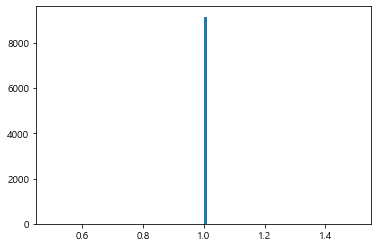

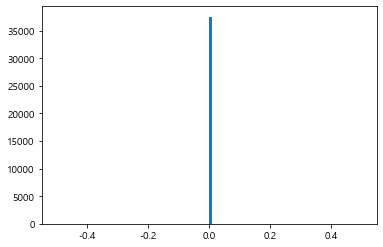

In [5]:
# 사은품을 포함하는 데이터셋
df_order_freegift=pd.DataFrame()
df_order_freegift=df_order_addFreegift[df_order_addFreegift["사은품"]==1]
print(df_order_freegift.shape)

# 사은품을 포함 안하는 데이터셋
df_order_product=pd.DataFrame()
df_order_product=df_order_addFreegift[df_order_addFreegift["사은품"]==0]
print(df_order_product.shape)
#이상치제거값용 사은품을 제외한 데이터 셋
df_order_pre2_product=df_order_product.copy() 
#사은품 모으는 데이터 셋
df_order_pre2_preegift=df_order_freegift.copy() 

plt.figure(3)
plt.hist(df_order_freegift["사은품"].dropna(),bins=100)
plt.show()

plt.figure(2)
plt.hist(df_order_product["사은품"].dropna(),bins=100)
plt.show()

count     46661.000000
mean      40845.938471
std       27199.206537
min           0.000000
25%       23100.000000
50%       44000.000000
75%       52800.000000
max      825000.000000
Name: 공급원가, dtype: float64


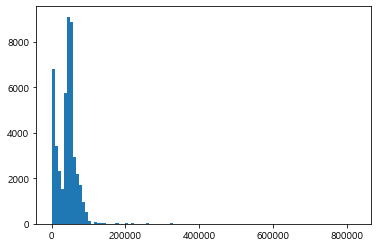

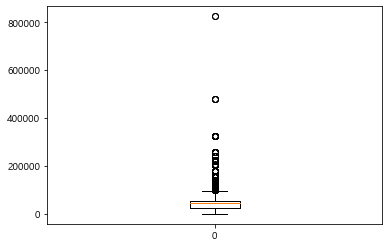

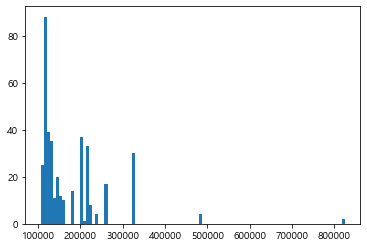

================================== 사은품 포함 ==================================================
_0 : 105600.0
_25 : 118800.0
_75 : 140800.0
_100 : 213950.0
count       390.000000
mean     175144.871795
std       84169.982876
min      105600.000000
25%      118800.000000
50%      140800.000000
75%      216975.000000
max      825000.000000
Name: 공급원가, dtype: float64
_0 : 105600.0
_25 : 118800.0
_75 : 140800.0
_100 : 213950.0
m1 : 105600.0
m2 : 118800.0
m3 : 140800.0
m4 : 213950.0


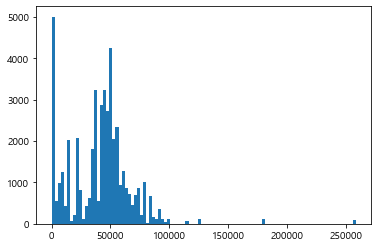

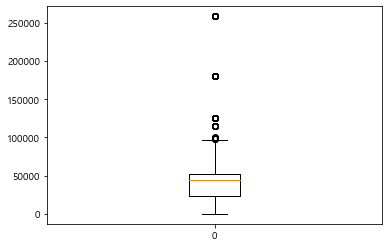

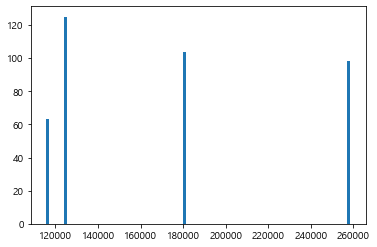

================================== 사은품 제외 ==========================================================
_0 : 105600.0
_25 : 118800.0
_75 : 140800.0
_100 : 213950.0
count       390.000000
mean     175144.871795
std       84169.982876
min      105600.000000
25%      118800.000000
50%      140800.000000
75%      216975.000000
max      825000.000000
Name: 공급원가, dtype: float64
_0 : 105600.0
_25 : 118800.0
_75 : 140800.0
_100 : 213950.0
m1 : 105600.0
m2 : 118800.0
m3 : 140800.0
m4 : 213950.0


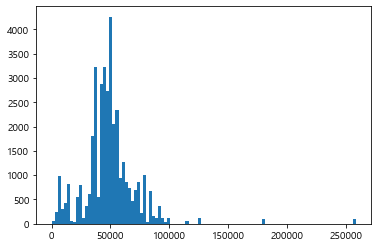

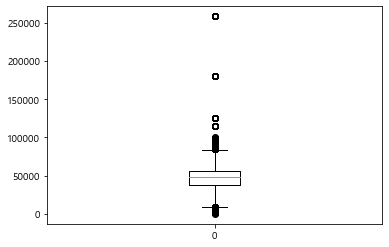

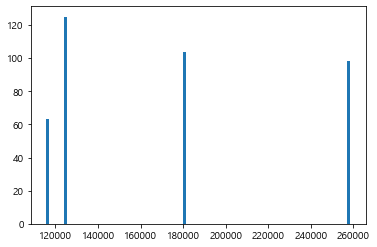

count     46661.000000
mean         74.309166
std        2776.640711
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      251600.000000
Name: 네이버 포인트, dtype: float64


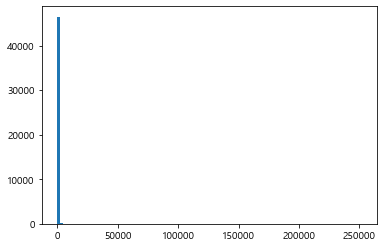

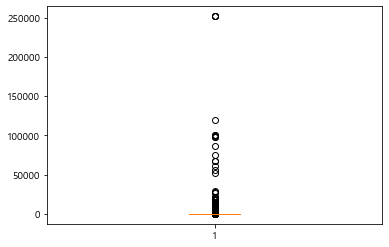

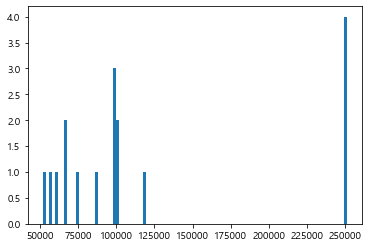

================================== 사은품 포함 ==================================================
_0 : 51610.0
_25 : 67220.0
_75 : 97760.0
_100 : 119340.0
count        17.000000
mean     122656.294118
std       75984.656969
min       51610.000000
25%       67220.000000
50%       97760.000000
75%      119340.000000
max      251600.000000
Name: 네이버 포인트, dtype: float64
_0 : 51610.0
_25 : 67220.0
_75 : 97760.0
_100 : 119340.0
m1 : 51610.0
m2 : 67220.0
m3 : 97760.0
m4 : 119340.0


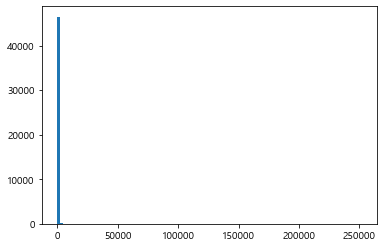

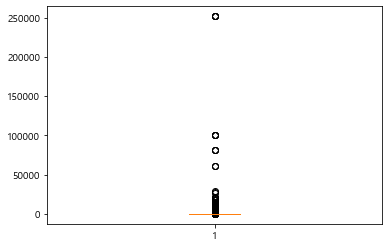

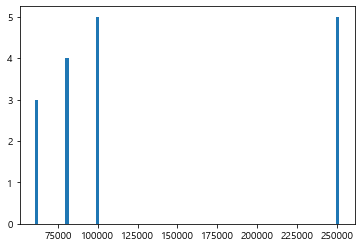

================================== 사은품 제외 ==========================================================
_0 : 51610.0
_25 : 67220.0
_75 : 97760.0
_100 : 119340.0
count        17.000000
mean     122656.294118
std       75984.656969
min       51610.000000
25%       67220.000000
50%       97760.000000
75%      119340.000000
max      251600.000000
Name: 네이버 포인트, dtype: float64
_0 : 51610.0
_25 : 67220.0
_75 : 97760.0
_100 : 119340.0
m1 : 51610.0
m2 : 67220.0
m3 : 97760.0
m4 : 119340.0


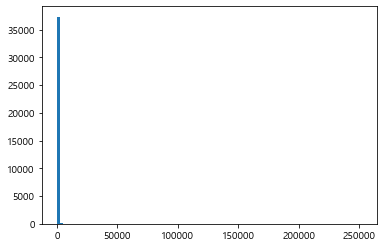

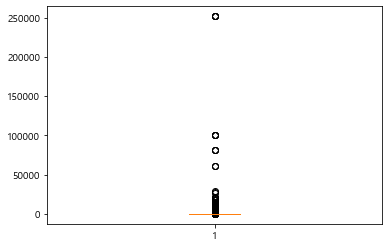

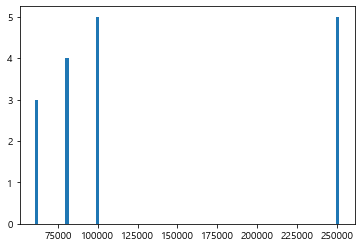

count     46661.000000
mean        846.970918
std        3827.691778
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      112230.000000
Name: 사용한 적립금액, dtype: float64


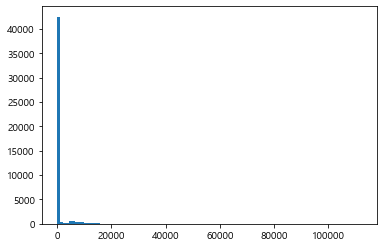

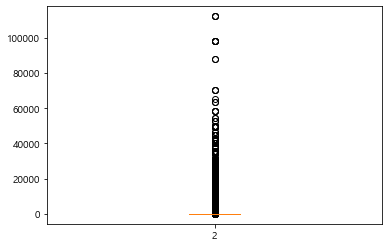

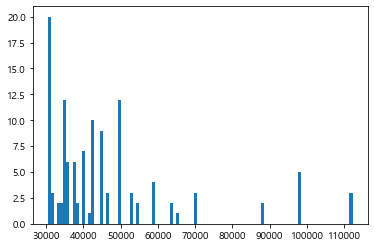

================================== 사은품 포함 ==================================================
_0 : 30560.0
_25 : 35000.0
_75 : 40675.0
_100 : 50000.0
count       120.000000
mean      46558.266667
std       18979.181550
min       30560.000000
25%       35000.000000
50%       40675.000000
75%       50000.000000
max      112230.000000
Name: 사용한 적립금액, dtype: float64
_0 : 30560.0
_25 : 35000.0
_75 : 40675.0
_100 : 50000.0
m1 : 30560.0
m2 : 35000.0
m3 : 40675.0
m4 : 50000.0


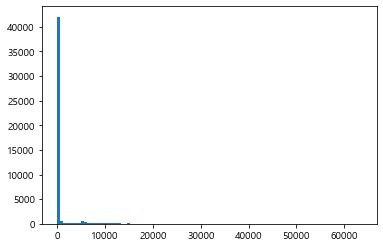

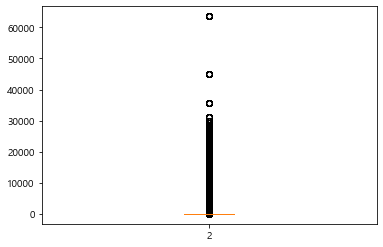

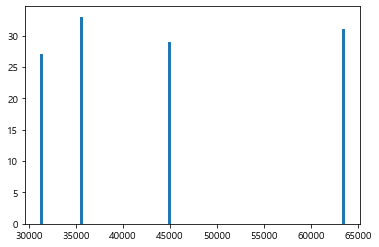

================================== 사은품 제외 ==========================================================
_0 : 30560.0
_25 : 35000.0
_75 : 42190.0
_100 : 50000.0
count       100.000000
mean      47169.650000
std       19187.477367
min       30560.000000
25%       35000.000000
50%       42190.000000
75%       50000.000000
max      112230.000000
Name: 사용한 적립금액, dtype: float64
_0 : 30560.0
_25 : 35000.0
_75 : 42190.0
_100 : 50000.0
m1 : 30560.0
m2 : 35000.0
m3 : 42190.0
m4 : 50000.0


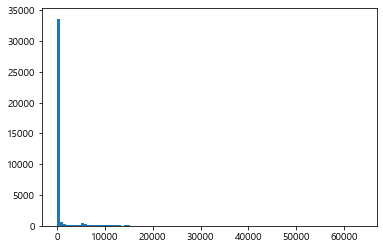

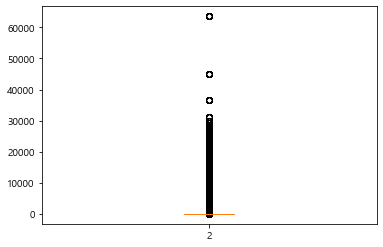

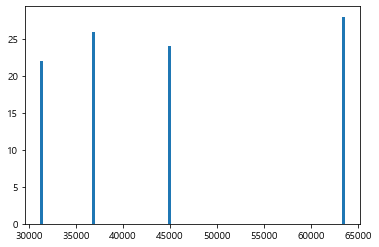

count    4.666100e+04
mean     6.937057e+04
std      6.613811e+04
min      0.000000e+00
25%      3.245000e+04
50%      6.780000e+04
75%      9.238000e+04
max      4.963400e+06
Name: 상품구매금액, dtype: float64


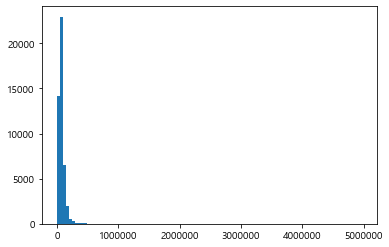

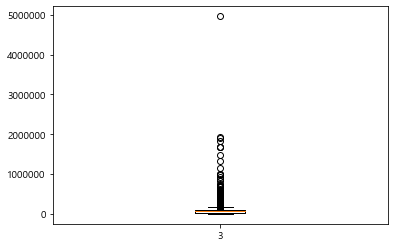

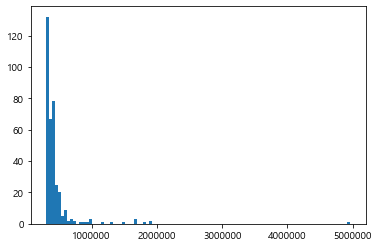

================================== 사은품 포함 ==================================================
_0 : 300960.0
_25 : 328275.0
_75 : 376200.0
_100 : 433950.0
count    3.590000e+02
mean     4.442153e+05
std      3.280903e+05
min      3.009600e+05
25%      3.282750e+05
50%      3.762000e+05
75%      4.339500e+05
max      4.963400e+06
Name: 상품구매금액, dtype: float64
_0 : 300960.0
_25 : 328275.0
_75 : 376200.0
_100 : 433950.0
m1 : 300960.0
m2 : 328275.0
m3 : 376200.0
m4 : 433950.0


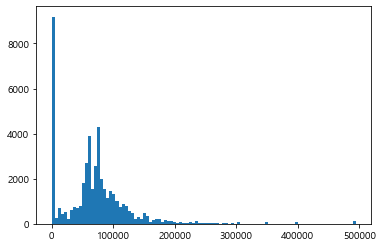

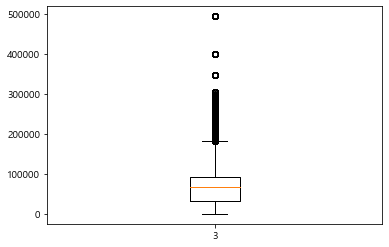

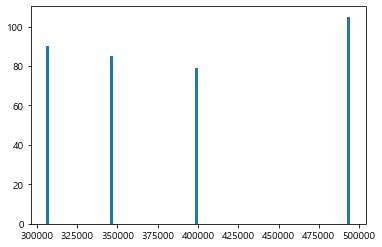

================================== 사은품 제외 ==========================================================
_0 : 300960.0
_25 : 328275.0
_75 : 376200.0
_100 : 433950.0
count    3.590000e+02
mean     4.442153e+05
std      3.280903e+05
min      3.009600e+05
25%      3.282750e+05
50%      3.762000e+05
75%      4.339500e+05
max      4.963400e+06
Name: 상품구매금액, dtype: float64
_0 : 300960.0
_25 : 328275.0
_75 : 376200.0
_100 : 433950.0
m1 : 300960.0
m2 : 328275.0
m3 : 376200.0
m4 : 433950.0


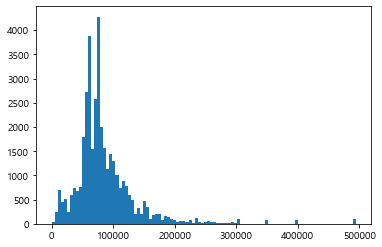

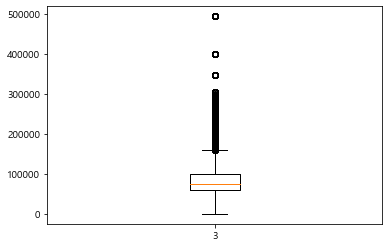

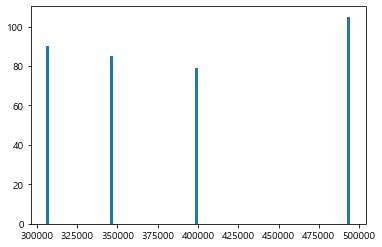

count     46661.000000
mean       8629.644885
std       12280.688713
min           0.000000
25%           0.000000
50%        2600.000000
75%       15000.000000
max      460000.000000
Name: 상품별 추가할인금액, dtype: float64


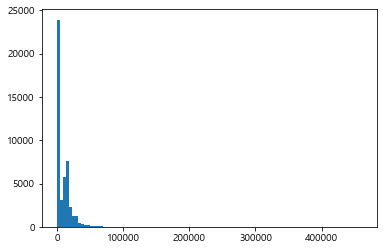

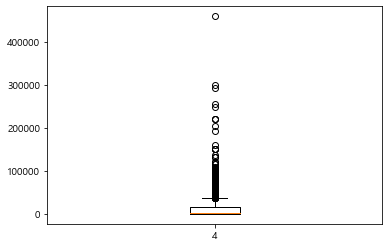

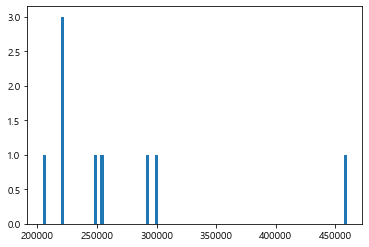

================================== 사은품 포함 ==================================================
_0 : 204400.0
_25 : 220500.0
_75 : 249200.0
_100 : 292000.0
count         9.000000
mean     269122.222222
std       78889.808876
min      204400.000000
25%      220500.000000
50%      249200.000000
75%      292000.000000
max      460000.000000
Name: 상품별 추가할인금액, dtype: float64
_0 : 204400.0
_25 : 220500.0
_75 : 249200.0
_100 : 292000.0
m1 : 204400.0
m2 : 220500.0
m3 : 249200.0
m4 : 292000.0


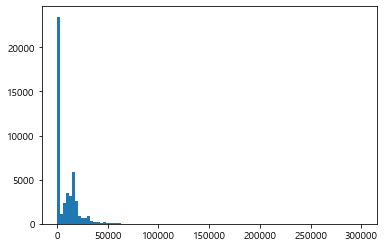

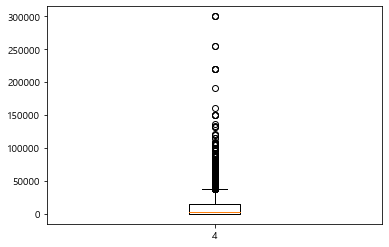

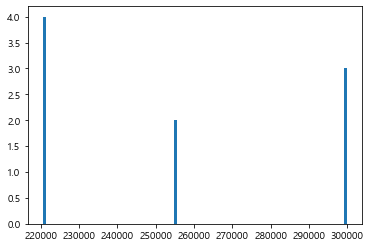

================================== 사은품 제외 ==========================================================
_0 : 204400.0
_25 : 220500.0
_75 : 249200.0
_100 : 292000.0
count         9.000000
mean     269122.222222
std       78889.808876
min      204400.000000
25%      220500.000000
50%      249200.000000
75%      292000.000000
max      460000.000000
Name: 상품별 추가할인금액, dtype: float64
_0 : 204400.0
_25 : 220500.0
_75 : 249200.0
_100 : 292000.0
m1 : 204400.0
m2 : 220500.0
m3 : 249200.0
m4 : 292000.0


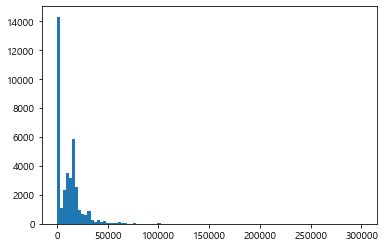

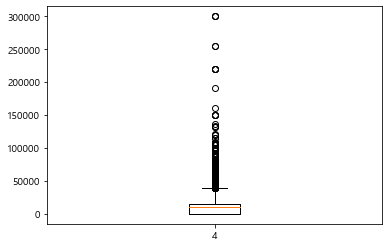

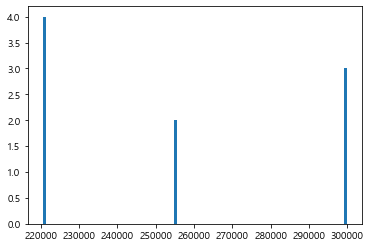

count      46661.000000
mean       58167.478944
std        40895.414438
min            0.000000
25%        30840.000000
50%        63070.000000
75%        81000.000000
max      1000000.000000
Name: 판매가, dtype: float64


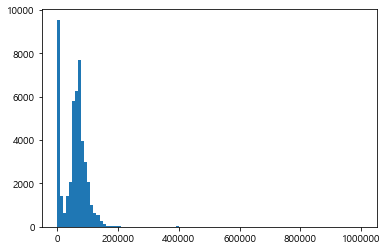

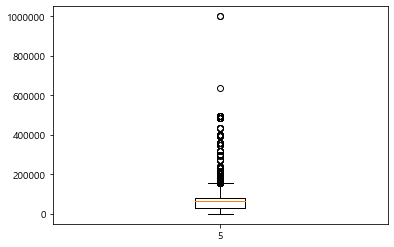

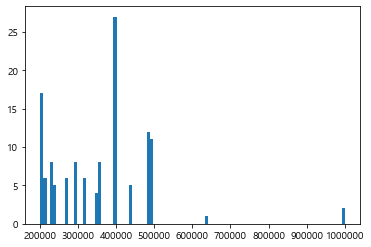

================================== 사은품 포함 ==================================================
_0 : 201600.0
_25 : 236445.0
_75 : 358600.0
_100 : 400000.0
count        126.000000
mean      354953.730159
std       132420.976017
min       201600.000000
25%       236032.500000
50%       358600.000000
75%       400000.000000
max      1000000.000000
Name: 판매가, dtype: float64
_0 : 201600.0
_25 : 236445.0
_75 : 358600.0
_100 : 400000.0
m1 : 201600.0
m2 : 236445.0
m3 : 358600.0
m4 : 400000.0


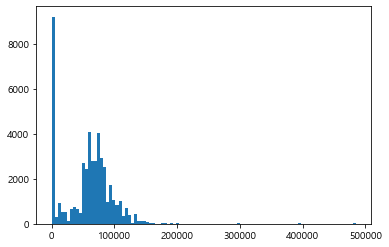

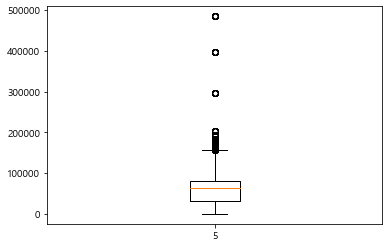

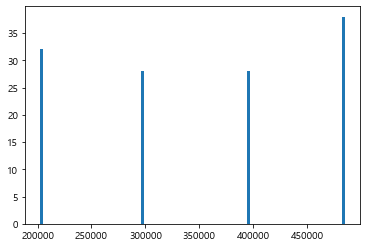

================================== 사은품 제외 ==========================================================
_0 : 201600.0
_25 : 236445.0
_75 : 358600.0
_100 : 400000.0
count        126.000000
mean      354953.730159
std       132420.976017
min       201600.000000
25%       236032.500000
50%       358600.000000
75%       400000.000000
max      1000000.000000
Name: 판매가, dtype: float64
_0 : 201600.0
_25 : 236445.0
_75 : 358600.0
_100 : 400000.0
m1 : 201600.0
m2 : 236445.0
m3 : 358600.0
m4 : 400000.0


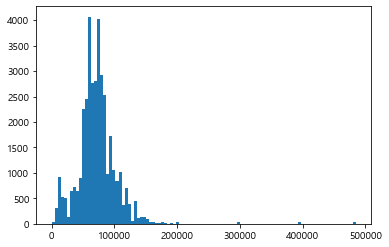

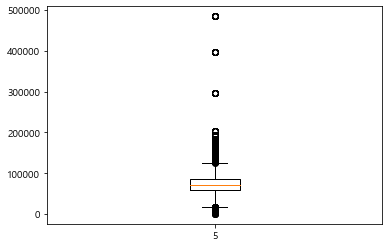

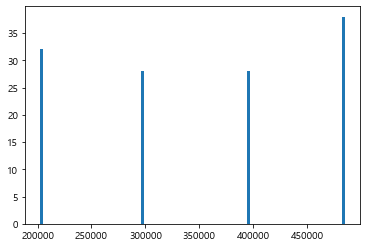

In [6]:
"""
이상치 처리
"""

ls=[ '공급원가','네이버 포인트', '사용한 적립금액', '상품구매금액','상품별 추가할인금액','판매가']
ls_thrshold=[100000,50000,30000,300000,200000,200000]
for i in range(len(ls)):
    print("===================================================================================================")
    print("===================================================================================================")
    print("===================================================================================================")
    print(df_order_pre1[ls[i]].describe())
    plt.figure(i+1)
    plt.hist(df_order_pre1[ls[i]].dropna(),bins=100)
    plt.figure(i+2)
    plt.boxplot(df_order_pre1[ls[i]].dropna(),labels =str(i))
    plt.figure(i+3)
    plt.hist(df_order_pre1[ls[i]].dropna()[df_order_pre1[ls[i]]>ls_thrshold[i]],bins=100)
    plt.show()
    
    print("================================== 사은품 포함 ==================================================")

    tt=df_order_pre1[df_order_pre1[ls[i]]>ls_thrshold[i]]
    _0=tt[ls[i]].quantile(q=0, interpolation='midpoint')
    _25=tt[ls[i]].quantile(q=0.25, interpolation='midpoint')
    _50=tt[ls[i]].quantile(q=0.50, interpolation='midpoint')
    _75=tt[ls[i]].quantile(q=0.75, interpolation='midpoint')
    quant = tt[ls[i]].quantile([0.25,.5,0.75])

    print(f"_0 : {_0}")
    print(f"_25 : {_25}")
    print(f"_75 : {_50}")
    print(f"_100 : {_75}")

    m1=tt[ls[i]].quantile(q=0.125, interpolation='midpoint')
    m2=tt[ls[i]].quantile(q=0.357, interpolation='midpoint')
    m3=tt[ls[i]].quantile(q=0.625, interpolation='midpoint')
    m4=tt[ls[i]].quantile(q=0.875, interpolation='midpoint')
    
    print(df_order_pre1[ls[i]].dropna()[df_order_pre1[ls[i]]>ls_thrshold[i]].describe())
    print(f"_0 : {_0}")
    print(f"_25 : {_25}")
    print(f"_75 : {_50}")
    print(f"_100 : {_75}")
    print(f"m1 : {_0}")
    print(f"m2 : {_25}")
    print(f"m3 : {_50}")
    print(f"m4 : {_75}")
    

    df_order_pre2.loc[(df_order_pre1[ls[i]]>=_0) & (df_order_pre1[ls[i]]<_25) , [ls[i]] ] = m1
    df_order_pre2.loc[(df_order_pre1[ls[i]]>=_25) & (df_order_pre1[ls[i]]<_50), [ls[i]]] = m2
    df_order_pre2.loc[(df_order_pre1[ls[i]]>=_50) & (df_order_pre1[ls[i]]<_75), [ls[i]]] = m3
    df_order_pre2.loc[df_order_pre1[ls[i]]>=_75, [ls[i]]] = m4

    plt.figure(i+7)
    plt.hist(df_order_pre2[ls[i]].dropna(),bins=100)
    plt.figure(i+8)
    plt.boxplot(df_order_pre2[ls[i]].dropna(),labels =str(i))
    plt.figure(i+9)
    plt.hist(df_order_pre2[ls[i]].dropna()[df_order_pre2[ls[i]]>ls_thrshold[i]],bins=100)
    plt.show()
    
    print("================================== 사은품 제외 ==========================================================")
    tt=df_order_product[df_order_product[ls[i]]>ls_thrshold[i]]
    _0=tt[ls[i]].quantile(q=0, interpolation='midpoint')
    _25=tt[ls[i]].quantile(q=0.25, interpolation='midpoint')
    _50=tt[ls[i]].quantile(q=0.50, interpolation='midpoint')
    _75=tt[ls[i]].quantile(q=0.75, interpolation='midpoint')
    quant = tt[ls[i]].quantile([0.25,.5,0.75])

    print(f"_0 : {_0}")
    print(f"_25 : {_25}")
    print(f"_75 : {_50}")
    print(f"_100 : {_75}")

    m1=tt[ls[i]].quantile(q=0.125, interpolation='midpoint')
    m2=tt[ls[i]].quantile(q=0.357, interpolation='midpoint')
    m3=tt[ls[i]].quantile(q=0.625, interpolation='midpoint')
    m4=tt[ls[i]].quantile(q=0.875, interpolation='midpoint')
    
    print(df_order_product[ls[i]].dropna()[df_order_product[ls[i]]>ls_thrshold[i]].describe())
    print(f"_0 : {_0}")
    print(f"_25 : {_25}")
    print(f"_75 : {_50}")
    print(f"_100 : {_75}")
    print(f"m1 : {_0}")
    print(f"m2 : {_25}")
    print(f"m3 : {_50}")
    print(f"m4 : {_75}")
    

    df_order_pre2_product.loc[(df_order_product[ls[i]]>=_0) & (df_order_product[ls[i]]<_25) , [ls[i]] ] = m1
    df_order_pre2_product.loc[(df_order_product[ls[i]]>=_25) & (df_order_product[ls[i]]<_50), [ls[i]]] = m2
    df_order_pre2_product.loc[(df_order_product[ls[i]]>=_50) & (df_order_product[ls[i]]<_75), [ls[i]]] = m3
    df_order_pre2_product.loc[df_order_product[ls[i]]>=_75, [ls[i]]] = m4

    plt.figure(i+7)
    plt.hist(df_order_pre2_product[ls[i]].dropna(),bins=100)
    plt.figure(i+8)
    plt.boxplot(df_order_pre2_product[ls[i]].dropna(),labels =str(i))
    plt.figure(i+9)
    plt.hist(df_order_pre2_product[ls[i]].dropna()[df_order_pre2[ls[i]]>ls_thrshold[i]],bins=100)
    plt.show()
    

    

In [7]:
"""
#데이터 프레임 저장
df_order_pre2.to_csv("./df_order_raw_preprocessed.csv", mode='w')
df_order_pre2_product.to_csv("./df_order_product_preprocessed.csv", mode='w')
df_order_pre2_preegift.to_csv("./df_order_freegift_preprocessed.csv", mode='w')
"""

'\n#데이터 프레임 저장\ndf_order_pre2.to_csv("./df_order_raw_preprocessed.csv", mode=\'w\')\ndf_order_pre2_product.to_csv("./df_order_product_preprocessed.csv", mode=\'w\')\ndf_order_pre2_preegift.to_csv("./df_order_freegift_preprocessed.csv", mode=\'w\')\n'

In [8]:
"""
#데이터 불러오기 확인
df_order_raw=pd.read_csv("./log_order_sheet.csv",engine="python",encoding='utf-8-sig')
df_member_raw=pd.read_csv("./master_member_sheet.csv",engine="python",encoding='utf-8-sig')
df_product_raw=pd.read_csv("./master_product_sheet.csv",engine="python",encoding='utf-8-sig')
df_order_pre1=pd.read_csv("./df_order_final_zerodragon.csv",engine="python",encoding='utf-8-sig') #결측치 처리
df_order_pre2=pd.DataFrame()
df_order_pre2=df_order_pre1.copy()


d1=pd.read_csv("./df_order_raw_preprocessed.csv",engine="python",encoding='utf-8-sig')
d2=pd.read_csv("./df_order_product_preprocessed.csv",engine="python",encoding='utf-8-sig')
d3=pd.read_csv("./df_order_freegift_preprocessed.csv",engine="python",encoding='utf-8-sig')
print(df_order_raw.shape)
print(df_member_raw.shape)
print(df_product_raw.shape)

print(d1.shape)
print(d2.shape)
print(d3.shape)

"""

'\n#데이터 불러오기 확인\ndf_order_raw=pd.read_csv("./log_order_sheet.csv",engine="python",encoding=\'utf-8-sig\')\ndf_member_raw=pd.read_csv("./master_member_sheet.csv",engine="python",encoding=\'utf-8-sig\')\ndf_product_raw=pd.read_csv("./master_product_sheet.csv",engine="python",encoding=\'utf-8-sig\')\ndf_order_pre1=pd.read_csv("./df_order_final_zerodragon.csv",engine="python",encoding=\'utf-8-sig\') #결측치 처리\ndf_order_pre2=pd.DataFrame()\ndf_order_pre2=df_order_pre1.copy()\n\n\nd1=pd.read_csv("./df_order_raw_preprocessed.csv",engine="python",encoding=\'utf-8-sig\')\nd2=pd.read_csv("./df_order_product_preprocessed.csv",engine="python",encoding=\'utf-8-sig\')\nd3=pd.read_csv("./df_order_freegift_preprocessed.csv",engine="python",encoding=\'utf-8-sig\')\nprint(df_order_raw.shape)\nprint(df_member_raw.shape)\nprint(df_product_raw.shape)\n\nprint(d1.shape)\nprint(d2.shape)\nprint(d3.shape)\n\n'

In [4]:
##주문,고객,제품 데이터 칼럼별 데이터 수 
for col in df_order_raw.columns:
    print("========================================")
    print(col,"num of kinds : ",len(df_order_raw[col].value_counts()))
for col in df_member_raw.columns:
    print("========================================")
    print(col,"num of kinds : ",len(df_member_raw[col].value_counts()))
for col in df_product_raw.columns:
    print("========================================")
    print(col,"num of kinds : ",len(df_product_raw[col].value_counts()))    

결제수단 num of kinds :  44
공급원가 num of kinds :  292
교환구분 num of kinds :  1
네이버 포인트 num of kinds :  347
배송번호 num of kinds :  37691
배송비 정보 num of kinds :  3
배송시작일 num of kinds :  1548
배송완료일 num of kinds :  2559
사용한 적립금액 num of kinds :  966
상품구매금액 num of kinds :  1872
상품명 num of kinds :  645
상품번호 num of kinds :  648
상품별 추가할인금액 num of kinds :  703
수량 num of kinds :  17
수령인 주소 num of kinds :  5854
주문 시 회원등급 num of kinds :  8
주문경로 num of kinds :  3
주문번호 num of kinds :  23938
주문일시 num of kinds :  22920
주문자ID num of kinds :  4956
카드사 num of kinds :  19
쿠폰 할인금액 num of kinds :  147
판매가 num of kinds :  1113
품목번호 num of kinds :  46749
ID num of kinds :  6575
나이 num of kinds :  66
사용가능 적립금 num of kinds :  713
성별 num of kinds :  2
주소(동/읍/면) num of kinds :  5220
최종접속일 num of kinds :  6398
최종주문일 num of kinds :  5081
유입경로 num of kinds :  12
유입기기 num of kinds :  2
회원 가입일 num of kinds :  743
사업자구분 num of kinds :  3
회원구분 num of kinds :  10
# num of kinds :  1020
공급사 num of kinds :  4
과세/면세 num of kinds :  2


In [9]:
# 데이터 셋별-변수별 데이터 종류 & 빈도수 확인
for col in df_order_raw.columns:
    print("========================================")
    print(col,"num of kinds : ",len(df_order_raw[col].value_counts()))
for col in df_order_raw.columns:
    print("==================",col,"======================")
    print("num of kinds : ",len(df_order_raw[col].value_counts()))
    print(df_order_raw[col].value_counts())
    print()


결제수단 num of kinds :  44
공급원가 num of kinds :  292
교환구분 num of kinds :  1
네이버 포인트 num of kinds :  347
배송번호 num of kinds :  37691
배송비 정보 num of kinds :  3
배송시작일 num of kinds :  1548
배송완료일 num of kinds :  2559
사용한 적립금액 num of kinds :  966
상품구매금액 num of kinds :  1872
상품명 num of kinds :  645
상품번호 num of kinds :  648
상품별 추가할인금액 num of kinds :  703
수량 num of kinds :  17
수령인 주소 num of kinds :  5854
주문 시 회원등급 num of kinds :  8
주문경로 num of kinds :  3
주문번호 num of kinds :  23938
주문일시 num of kinds :  22920
주문자ID num of kinds :  4956
카드사 num of kinds :  19
쿠폰 할인금액 num of kinds :  147
판매가 num of kinds :  1113
품목번호 num of kinds :  46749
================== 결제수단 ======================
num of kinds :  44
무통장입금                 24171
카드                    13703
적립금,무통장입금              3374
쿠폰,카드                  1306
적립금,카드                 1276
쿠폰,무통장입금               1204
휴대폰                     430
실시간계좌이체                 322
예치금,무통장입금               175
가상계좌                    130
카드,무통장입금                10

num of kinds :  46749
67583    1
42334    1
36187    1
40281    1
38232    1
        ..
15026    1
8881     1
10928    1
62123    1
65536    1
Name: 품목번호, Length: 46749, dtype: int64



In [31]:
#키워드 포함 데이터 검색
ct=0
df=df_order_raw # 찾는 데이터셋
col="카테고리"   # 변수명
word="식자재"  # 포함하는 단어
for i in range(len(df[col])):
    if word in str(df[col].loc[i]) :
        print(df.loc[i,col])
        ct+=1
print(f"해당제품 갯수 : {ct}")


050 : 식자재
050001 : 식자재 > 한식 식자재
050001012 : 식자재 > 한식 식자재 > 김
026 : NEW
026010 : NEW > 식자재
026010001 : NEW > 식자재 > 한식 식자재
026010001012 : NEW > 식자재 > 한식 식자재 > 김
050 : 식자재
050001 : 식자재 > 한식 식자재
050001012 : 식자재 > 한식 식자재 > 김
026 : NEW
026010 : NEW > 식자재
026010001 : NEW > 식자재 > 한식 식자재
026010001012 : NEW > 식자재 > 한식 식자재 > 김
050 : 식자재
050001 : 식자재 > 한식 식자재
050001012 : 식자재 > 한식 식자재 > 김
026 : NEW
026010 : NEW > 식자재
026010001 : NEW > 식자재 > 한식 식자재
026010001012 : NEW > 식자재 > 한식 식자재 > 김
050 : 식자재
050001 : 식자재 > 한식 식자재
050001012 : 식자재 > 한식 식자재 > 김
026 : NEW
026010 : NEW > 식자재
026010001 : NEW > 식자재 > 한식 식자재
026010001012 : NEW > 식자재 > 한식 식자재 > 김
050 : 식자재
050002 : 식자재 > 중식 식자재
050002002 : 식자재 > 중식 식자재 > 장류
050 : 식자재
050002 : 식자재 > 중식 식자재
050002002 : 식자재 > 중식 식자재 > 장류
050 : 식자재
050002 : 식자재 > 중식 식자재
050002002 : 식자재 > 중식 식자재 > 장류
026 : NEW
026010 : NEW > 식자재
026010002 : NEW > 식자재 > 중식 식자재
026010002002 : NEW > 식자재 > 중식 식자재 > 장류
061 : vol.4 Catalogue
061021 : vol.4 Catalogue > 카달로그_1
050 : 식자재
050005 : 식자재 

In [35]:
df=pd.read_csv("C:/Users/sskim/Desktop/빅데이터 프로젝트/DATA/product/product_category_sheet.csv",engine="python",encoding='utf-8-sig')

In [38]:
print(df['reg_카테고리'].value_counts())

식자재 시럽류 카페 식재료             59
소모품 주방용품 양념통세트             57
식자재                        46
쥬스 베이커리 더치커피용기 카페 용기 생수    42
실링용기 실링제품                  38
                           ..
식자재 소모품 주방용품                1
파우더 식자재 향신료                 1
소모품 주방용품 쟁반                 1
단무지 캔류 태국 식자재 병류 베트남 한식     1
컵홀더 베이커리 카페 용기 컵캐리어         1
Name: reg_카테고리, Length: 129, dtype: int64
